In [489]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [490]:
kon = 1e5
Ainnit = 1e-4
k = kon*Ainnit
rho = 0.2
delta = 4
r1_0 = 0
A2_0 = 0
A0_0 = 1
koff = 1e-4
t_end = 200
z0 = [A0_0, A2_0]
z01 = [A0_0, A2_0, r1_0]
t = np.geomspace(1e-6, t_end, 10000)
C = r1_0 + A0_0 - A2_0
C1 = 1 -C
t_span = [0, t_end]


In [491]:
def simple_model(t, z):
    dA0 = -2*k*rho*z[0]*(C1+z[0]-z[1]) + koff*(1-z[0]-z[1])*(C-z[0]+z[1])
    dA2 = k*delta*rho*(1-z[0]-z[1])*(C1 +z[0]-z[1]) - 2*koff*(z[1])*(C-z[0]+z[1])

    return [dA0, dA2]

In [492]:
def corrected_model(t, z):

    dA0 = -2*k*rho*(1-z[2])*z[0] + koff*z[2]*(1-z[0]-z[1])
    dA2 = delta*k*rho*z[2]*(1-z[2])*(1-z[0]-z[1]) - 2*koff*(z[2]**2)*z[1]
    drb = 2*k*rho*(1-z[2])*z[0] - koff*z[2]*(1-z[0]-z[1]) + delta*k*rho*z[2]*(1-z[2])*(1-z[0]-z[1]) - 2*koff*(z[2]**2)*z[1]
    
    dz = [dA0, dA2, drb]

    return dz

In [493]:
def corrected_model_no_r(t, z):

    dA0 = -2*k*rho*(z[0]-z[1])*z[0] + koff*(1-z[0]+z[1])*(1-z[0]-z[1])
    dA2 = delta*k*rho*(1-z[0]+z[1])*(z[0]-z[1])*(1-z[0]-z[1]) - 2*koff*((1-z[0]+z[1])**2)*z[1]

    return [dA0, dA2]

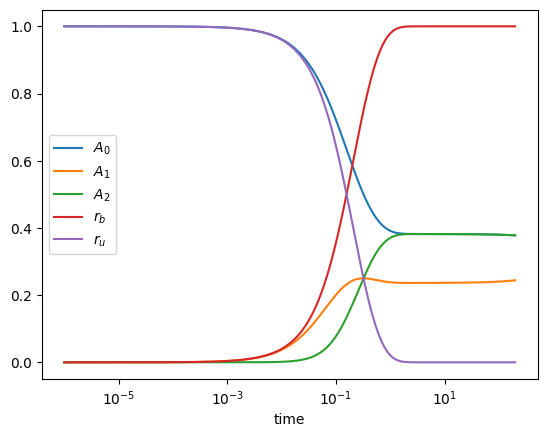

In [494]:
z = solve_ivp(simple_model, t_span, z0, method="Radau", t_eval=t)
A1 = 1 - z.y[0] - z.y[1]
rb = C - z.y[0] + z.y[1]
ru = 1 - rb

plt.plot(t, z.y[0], label = r'$A_0$')
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, z.y[1], label = r'$A_2$')
plt.plot(t, rb, label = r'$r_b$')
plt.plot(t, ru, label = r'$r_u$')
plt.xscale('log')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

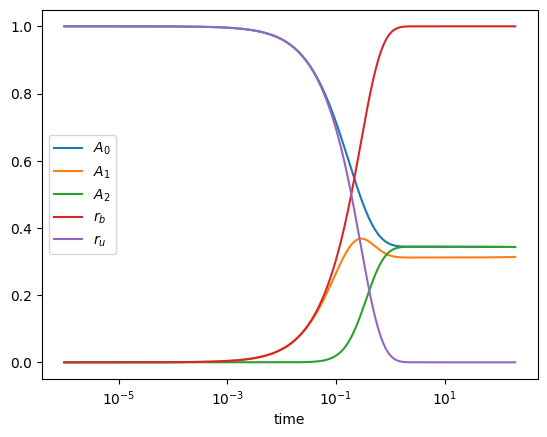

In [495]:
z = solve_ivp(corrected_model, t_span, z01, method="Radau", t_eval=t)
A1 = 1 - z.y[0] - z.y[1]
r_u = 1 - z.y[2]

plt.plot(t, z.y[0], label = r'$A_0$')
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, z.y[1], label = r'$A_2$')
plt.plot(t, z.y[2], label = r'$r_b$')
plt.plot(t, r_u, label = r'$r_u$')
plt.xscale('log')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

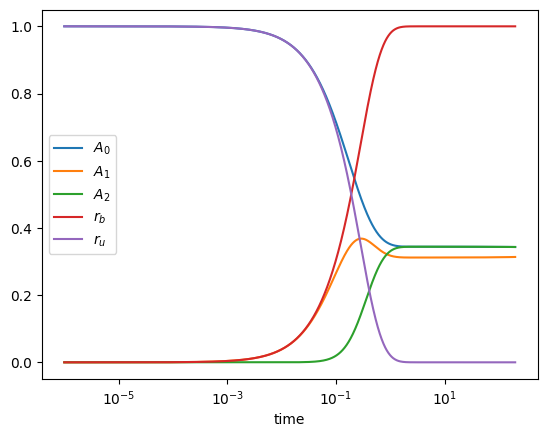

In [496]:
z = solve_ivp(corrected_model_no_r, t_span, z0, method="Radau", t_eval=t)
A1 = 1 - z.y[0] - z.y[1]
r_b = 1 - z.y[0] + z.y[1]
r_u = 1-r_b

plt.plot(t, z.y[0], label = r'$A_0$')
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, z.y[1], label = r'$A_2$')
plt.plot(t, r_b, label = r'$r_b$')
plt.plot(t, r_u, label = r'$r_u$')
plt.xscale('log')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

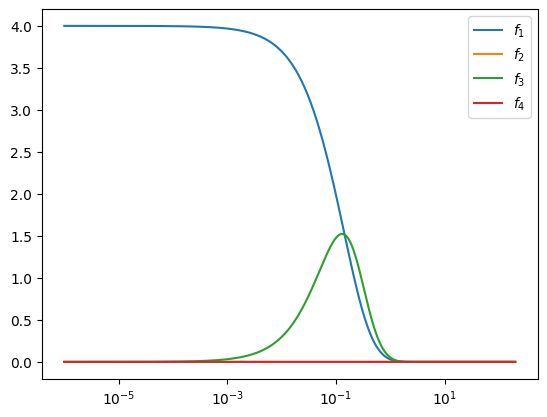

In [497]:
f1 = 2*k*rho*z.y[0]*(C1+z.y[0]-z.y[1])
f2 = koff*(1-z.y[0]-z.y[1])*(C-z.y[0]+z.y[1])
f3 = k*delta*rho*(1-z.y[0]-z.y[1])*(C1 +z.y[0]-z.y[1])
f4 = 2*koff*(z.y[1])*(C-z.y[0]+z.y[1])
plt.plot(t, f1, label=r'$f_1$')
plt.plot(t, f2, label = r'$f_2$')
plt.plot(t, f3, label=r'$f_3$')
plt.plot(t, f4, label = r'$f_4$')
plt.legend()
plt.xscale('log')
plt.show()

In [498]:
from scipy.optimize import fsolve

In [499]:
def func(x, t):
    return ((np.log(x**2 + (delta/2)*((x**(3+(delta/2))/2) - x**(2+(delta/2)) + (x**(1+(delta/2))/2))))/(2*x + (delta/2)*((((6+delta)/4)*x**(2+(delta/2))) - (((4+delta)/2)*x**(1+(delta/2))) + (((2+delta)/4)*x**((delta/2)))))) + 2*k*rho*t

def A2(x):
    return -(delta/2)*((x**(2+(delta/2))/2) - x**(1+(delta/2)) + (x**(delta/2)/2))

A_0_vals = np.ones_like(t)
A_2_vals = np.ones_like(t)

for i in range(len(A_0_vals)):  
    A_0_vals[i] = fsolve(func, 0.9, args=t[i])
    A_2_vals[i] = A2(A_0_vals[i])


/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_927/3744568002.py:2: RuntimeWarning: invalid value encountered in log
  return ((np.log(x**2 + (delta/2)*((x**(3+(delta/2))/2) - x**(2+(delta/2)) + (x**(1+(delta/2))/2))))/(2*x + (delta/2)*((((6+delta)/4)*x**(2+(delta/2))) - (((4+delta)/2)*x**(1+(delta/2))) + (((2+delta)/4)*x**((delta/2)))))) + 2*k*rho*t
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


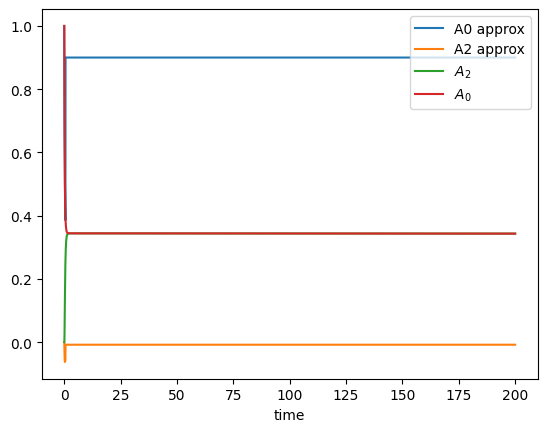

In [500]:
plt.plot(t, A_0_vals, label='A0 approx')
plt.plot(t, A_2_vals, label='A2 approx')
plt.plot(t, z.y[1], label = r'$A_2$')
plt.plot(t, z.y[0], label = r'$A_0$')
#plt.xscale('log')
plt.xlabel('time')
plt.legend()
plt.show()

In [501]:
def func_ehalf(x):
    return (delta-1)*x - (delta/2)*np.log(x) - delta

roots = fsolve(func_ehalf, 1)
print(roots)

[1.67866648]


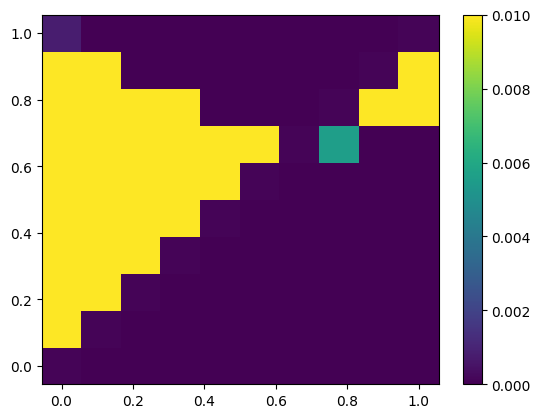

In [502]:
def f1(x,y):
    return -2*k*rho*(x-y)*x + koff*(1-x+y)*(1-x-y)

def f2(x,y):
    return delta*k*rho*(1-x+y)*(x-y)*(1-x-y) - 2*koff*((1-x+y)**2)*y

x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)

X, Y = np.meshgrid(x, y)

plt.pcolor(X, Y, f1(X,Y)-f2(X,Y), vmin=0, vmax=0.01)
plt.colorbar()

plt.show()